
# Project: Why do patients miss their appointments?
> Data Source: [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Provided by [Aquarela](https://www.aquare.la/en/) this dataset is about patients show-up rate. The colulmns include independent variables like patient information, appointment information, way of communication regarding the appointment and one dependent varible No-show.

The detailed description of each feature is listed as follows: 
* 01 - PatientId Identification of a patient
* 02 - AppointmentID Identification of each appointment
* 03 - Gender Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* 04 - AppointmentDay The day of the actuall appointment, when they have to visit the doctor.
* 05 - ScheduledDay The day someone called or registered the appointment, this is before appointment of course.
* 06 - Age
* 07 - Neighbourhood Where the appointment takes place.
* 08 - Scholarship True of False . Observation, this is a broad topic, consider reading [this article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
* 09 - Hipertension True or False
* 10 - Diabetes True or False
* 11 - Alcoholism True or False
* 12 - Handcap True or False
* 13 - SMS_received 1 or more messages sent to the patient.
* 14 - No-show True or False.

### Research Questions:
1. How many patients were sampled in this dataset and what's the percentage of no-show? 
2. Is any gender group tend to no-show than another? 
3. Is there any pattern in no-show date?
4. Are patients more likely to skip appointment if it was made long time ago? 
5. Correlation between 'Age','Neighbourhood', 'Scholarship',certain diseases and dependent variable 'No-show'

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('Medical Appointment No Show.csv',sep = ',')
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
13707,4.285668e+13,5584311,M,2016-04-14T13:41:24Z,2016-05-13T00:00:00Z,8,ILHA DE SANTA MARIA,0,0,0,0,0,0,Yes
32550,1.257675e+12,5695101,F,2016-05-13T09:31:24Z,2016-05-13T00:00:00Z,29,JABOUR,1,0,0,0,0,0,No
41048,9.292685e+13,5538878,M,2016-04-01T13:40:54Z,2016-05-05T00:00:00Z,32,MARIA ORTIZ,0,0,0,0,0,1,Yes
74850,9.361877e+13,5711882,M,2016-05-18T08:11:21Z,2016-05-18T00:00:00Z,7,SÃO PEDRO,0,0,0,0,0,0,No
52279,3.277926e+11,5625754,M,2016-04-27T07:33:15Z,2016-05-02T00:00:00Z,57,INHANGUETÁ,0,1,0,1,0,1,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data cleaning needed part1: 
1. Change PatientId from float to string datatype
2. Change AppointmentID from int to string datatype
3. Transform ScheduledDay and AppointmentDay to datetime in 'MM-DD-YYYY' format
4. Rename the column 'No-show' to 'No_show'

In [10]:
# Make a copy of oringinal dataset
df_1 = df.copy()

In [11]:
# Change PatientId from float to string datatype
df_1['PatientId'] = df_1['PatientId'].astype(str)

In [12]:
# Change AppointmentID from int to string datatype
df_1['AppointmentID'] = df_1['AppointmentID'].astype(str)

In [13]:
# Transform ScheduledDay and AppointmentDay to datetime
df_1['AppointmentDay'] = pd.to_datetime(df_1['AppointmentDay'].str[0:11])
df_1['ScheduledDay'] = pd.to_datetime(df_1['ScheduledDay'].str[0:11])

In [14]:
# Rename the column 'No-show' to 'No_show'
df_1.rename({'No-show':'No_show'}, axis = 1, inplace = True )

In [15]:
# check the new df_1 after cleaning
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No_show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

In [16]:
df_1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data quality issues 

There are errouneous records for Age, for example min is -1 and max is 115, which are not quite possible for normal human beings


In [17]:
# Save the index of outliers to a list
outliers = df_1.loc[(df_1.Age < 0) | (df_1.Age >= 100)].index

In [18]:
# Drop erroneous rows by their indexs
df_1.drop(labels=outliers,axis = 0, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 What is the percentage of no-shows? 

In [20]:
# percent of noshows in terms of entire sampled patients
print("Percentage of no-shows: {}%". 
     format(np.round(df_1.query("No_show =='Yes'").shape[0] / df_1.shape[0] *100)))

Percentage of no-shows: 20.0%


### Research Question 2  Is any gender group tend to have no-shows than another? 

In [21]:
num_of_female = len(df_1[df_1['Gender'] == 'F'])
num_of_male = len(df_1[df_1['Gender'] == 'M'])
f_noshow = df_1.loc[(df_1['No_show'] == 'Yes') & (df_1['Gender'] == 'F')]
m_noshow = df_1.loc[(df_1['No_show'] == 'Yes') & (df_1['Gender'] == 'M')]

In [22]:
# percent of noshows in terms of female and male patients

print("Percentage of no-shows for female patients: {}%". 
     format(f_noshow.shape[0] / num_of_female * 100))
print("Percentage of no-shows for male patients: {}%". 
     format(m_noshow.shape[0] / num_of_male * 100))

Percentage of no-shows for female patients: 20.313239593484617%
Percentage of no-shows for male patients: 19.96898022489337%


In [23]:
print('Percentage of female patients of total noshows: {}%'.
      format(f_noshow.shape[0] / (f_noshow.shape[0] + m_noshow.shape[0]) * 100))

Percentage of female patients of total noshows: 65.38358128696899%


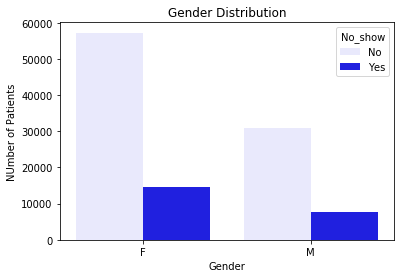

In [24]:
ax = sns.countplot(x='Gender', hue='No_show', data = df_1, color = 'b')
ax.set(title = 'Gender Distribution', ylabel = 'NUmber of Patients')
plt.show();

> Findings: Gender does not have significant impact on noshows as we can tell from the percentage numbers and bar chart above. Around 20% of male and female did not show up for their appointments, even though there are 65% of female patients in total noshows, which is due to the higher volume of female patients than males.

### Research Question 3 Is there any pattern in no-show date? (Time Series Analysis)

The sample contains patients' appointment date from Nov.15, 2015 to Jun.8, 2016. We would like to find out how are the noshows fluctuate among days.

In [25]:
print(df_1["AppointmentDay"].min(), df_1["AppointmentDay"].max())

2016-04-29 00:00:00 2016-06-08 00:00:00


In [26]:
pivot_AppDate = df_1.groupby(['AppointmentDay','No_show']).count()['PatientId']

In [27]:
pivot_AppDate

AppointmentDay  No_show
2016-04-29      No         2602
                Yes         633
2016-05-02      No         3515
                Yes         861
2016-05-03      No         3424
                Yes         831
2016-05-04      No         3195
                Yes         973
2016-05-05      No         3466
                Yes         807
2016-05-06      No         3084
                Yes         795
2016-05-09      No         3501
                Yes        1019
2016-05-10      No         3316
                Yes         992
2016-05-11      No         3589
                Yes         885
2016-05-12      No         3557
                Yes         837
2016-05-13      No         3082
                Yes         905
2016-05-14      No           30
                Yes           9
2016-05-16      No         3564
                Yes        1048
2016-05-17      No         3437
                Yes         935
2016-05-18      No         3483
                Yes         890
2016-05-19      

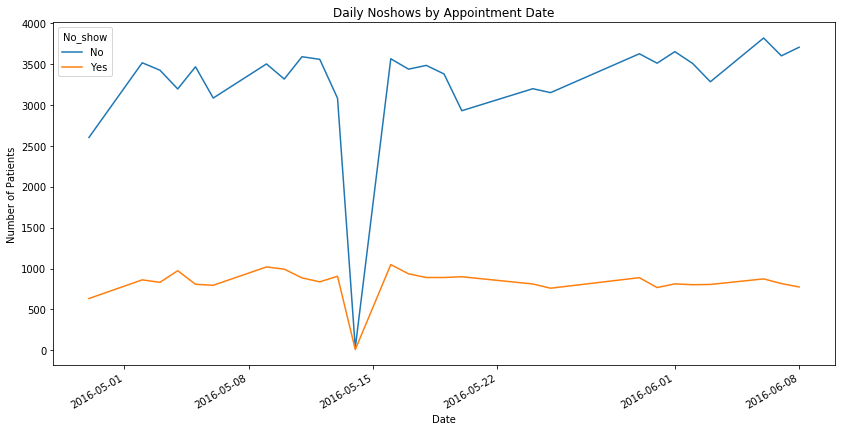

In [28]:
fig, ax = plt.subplots(figsize=(14,7))
pivot_AppDate.unstack().plot(ax=ax)
ax.set(title = "Daily Noshows by Appointment Date",xlabel='Date',ylabel='Number of Patients')
plt.show();

> Findings: The absolute numbers of Noshows did not fluctuate too much over the time other than upswings arond 2016-05-03 and 2016-05-16. In addtion, the total patient visits has a dip at 2015-05-14 which could due to clinic close-down, national holiday or data entry error.

### Research Question 4 Are patients more likely to skip appointments if they were made many days ago? 

Intuitively, if patients schedule an appointment long time ago, there is a higher possibility that they cannot make it for the visit. In order to anwser this question, we need to create a new feature 'Lag' to reflect the time between ScheduledDate and AppointmentDate.

In [29]:
df_1['Lag'] = df_1['AppointmentDay'] - df_1['ScheduledDay']
df_1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Lag
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [30]:
count = df_1.groupby(['Lag','No_show'], as_index = False)['PatientId'].count()
count

,Lag,No_show,PatientId
0,-6 days,Yes,1
1,-1 days,Yes,4
2,0 days,No,36768
3,0 days,Yes,1792
4,1 days,No,4098
...,...,...,...
232,169 days,Yes,1
233,176 days,No,10
234,176 days,Yes,6
235,179 days,No,8


In [31]:
count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Lag        237 non-null    timedelta64[ns]
 1   No_show    237 non-null    object         
 2   PatientId  237 non-null    int64          
dtypes: int64(1), object(1), timedelta64[ns](1)
memory usage: 7.4+ KB


In [32]:
positive_counts = count[count['Lag'] > pd.Timedelta(0)]

In [42]:
positive_counts

,Lag,No_show,PatientId
4,1 days,No,4098
5,1 days,Yes,1113
6,2 days,No,5122
7,2 days,Yes,1602
8,3 days,No,2093
...,...,...,...
232,169 days,Yes,1
233,176 days,No,10
234,176 days,Yes,6
235,179 days,No,8


In [35]:
# slicing the data to noshows VS shows
y_a = positive_counts[positive_counts['No_show']=='Yes']
y_b = positive_counts[positive_counts['No_show']=='No']
X = positive_counts['Lag']

In [36]:
# convert the lag column to string type for plotting purpose
y_a['Lag'] = y_a['Lag'].astype(str)
y_b['Lag'] = y_b['Lag'].astype(str)

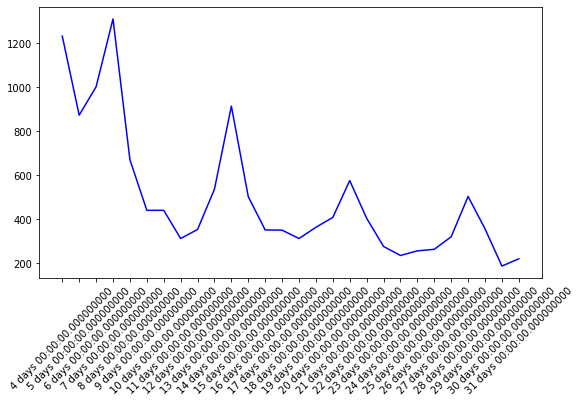

In [59]:
fig, ax = plt.subplots(1, figsize=(9,5))
ax.plot(y_a['Lag'][3:31], y_a['PatientId'][3:31], color='b')
ax.set_xticklabels(y_a['Lag'][3:31][::1], rotation=45);

# clear out the x axis label 
# enlarge the figure size

> Findings: By breaking down the lag days, we can see there are several peaks at 3 days, 10days, 17days and 25 days from the date when appointment were made.

### Research Question 5 Correlation between some independent variables and dependent variable 'No-show'

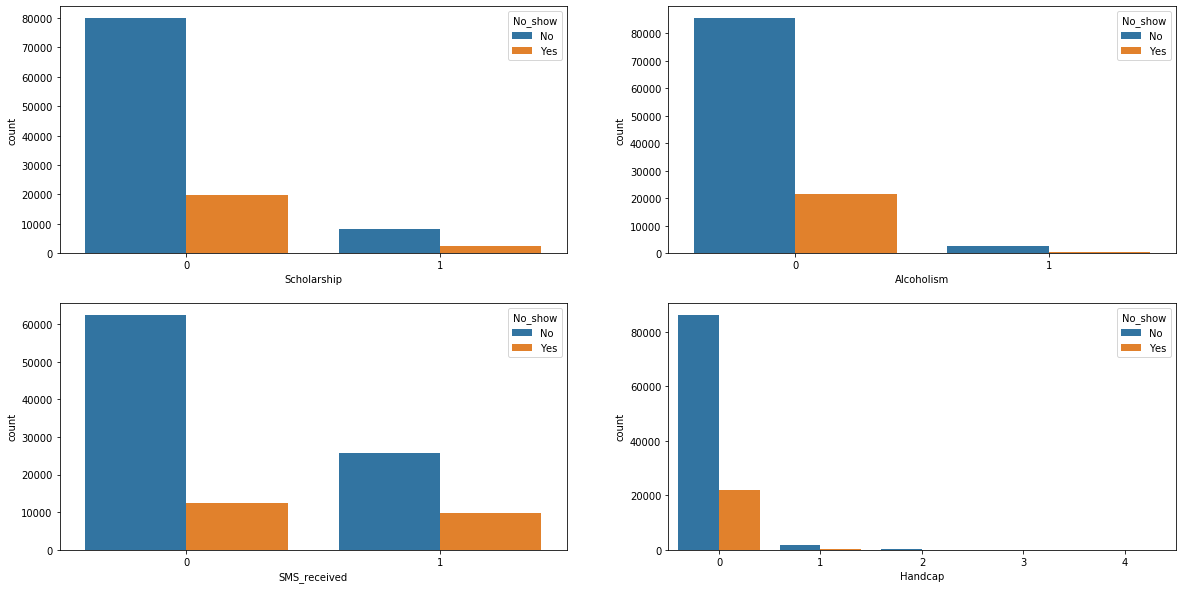

In [70]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Scholarship', hue='No_show', data=df_1, ax=axss[0][0])
sns.countplot(x='Alcoholism', hue='No_show', data=df_1, ax=axss[0][1])
sns.countplot(x='SMS_received', hue='No_show', data=df_1, ax=axss[1][0])
sns.countplot(x='Handcap', hue='No_show', data=df_1, ax=axss[1][1]);

<a id='conclusions'></a>
## Conclusions
#### Insights
1. The average no-show rate in this sample dataset is 20%
2. Gender does not make too much of difference in terms of no-shows
3. The absolute numbers of No-shows did not fluctuate too much over the time other than upswings around 2016-05-03 and 2016-05-16. Potentially, there could be a data entry error for Appointment Day 2015-05-14.
4. No-show rate varies in terms of different time lags between scheduled day and actual appointment day.
5. There is a higher no-show rate for those who received at least one SMS message than those who didn't.


#### Limitations
1. Most of the findings are concluded from exploratory analysis and visualization which lack of solid statistics proof.
2. For research question3, it could use more complex time series models to find out more useful insights about higher no-show rates on which days within a week and what time range within a day.
3. Data quality issues still exist, for example Handcap feature is supposed to have only two values: 0 and 1, however, 0, 1, 2, 3,and 4 are presented in the dataset.



#### Next Steps
1. Add feature preprocessing and feature engineering steps, for example: feature encoding and normalization
2. Build out machine learning models like logistics regression and random forest to predict whether a patient would show up or not.